  대구 각 행정구   총합계
0       남구   665
1      달서구  4314
2      달성군  2603
3       동구  3994
4       북구  3040
5       서구  1207
6      수성구  3713
7       중구  1703


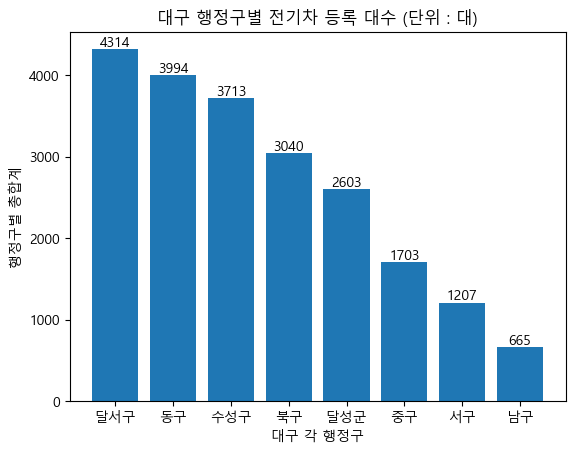

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
# 대구 행정동별 전기차 등록 대수
data1 = pd.read_csv('DaeguElectricCarRegisterNumber.csv', encoding='euc-kr')
df1 = pd.DataFrame(data1)
#print(df1['행정동명'])
# 행정동명에서 구 단위 추출
df1['대구 각 행정구'] = df1['행정동명'].str.split(' ').str[1]
# 새로운 DataFrame 생성 (구 단위로 그룹화하여 전기차 등록 대수 합계 계산)
df1_grouped = df1.groupby('대구 각 행정구')['총합계'].sum().reset_index()
# 결과 출력
print(df1_grouped)

df1_grouped = df1_grouped.sort_values('총합계', ascending=False)
plt.bar(df1_grouped['대구 각 행정구'], df1_grouped['총합계'])
plt.xlabel('대구 각 행정구')
plt.ylabel('행정구별 총합계')
plt.title('대구 행정구별 전기차 등록 대수 (단위 : 대)')

for i, v in enumerate(df1_grouped['총합계']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

   시군구  행정구별 합계
0   남구       13
1  달서구       58
2  달성군       31
3   동구       39
4   북구       57
5   서구       18
6  수성구       55
7   중구       18


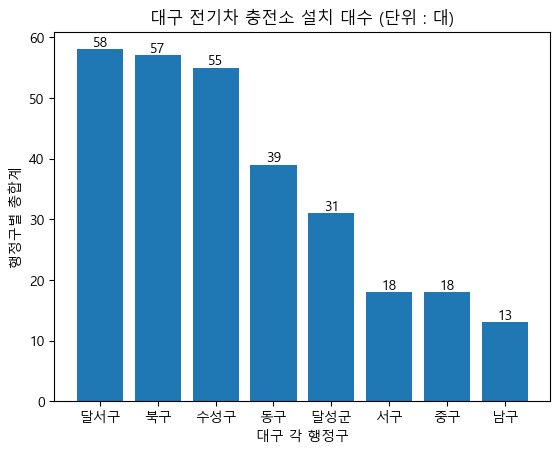

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
# 대구 전기차 충전소 설치 대수
data2 = pd.read_csv('DaeguElectricCarChargerNumber.csv', encoding='utf-8')
df2 = pd.DataFrame(data2)

# '시군구' 열을 기준으로 그룹화하고 '행정구별 합계' 열 생성
df2_grouped = df2.groupby('시군구').size().reset_index(name='행정구별 합계')

print(df2_grouped)

df2_grouped = df2_grouped.sort_values('행정구별 합계', ascending=False)
plt.bar(df2_grouped['시군구'], df2_grouped['행정구별 합계'])
plt.xlabel('대구 각 행정구')
plt.ylabel('행정구별 총합계')
plt.title('대구 전기차 충전소 설치 대수 (단위 : 대)')

for i, v in enumerate(df2_grouped['행정구별 합계']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

  대구 각 행정구    충전소당 차량수
0       남구   51.153846
1      달서구   74.379310
2      달성군   83.967742
3       동구  102.410256
4       북구   53.333333
5       서구   67.055556
6      수성구   67.509091
7       중구   94.611111


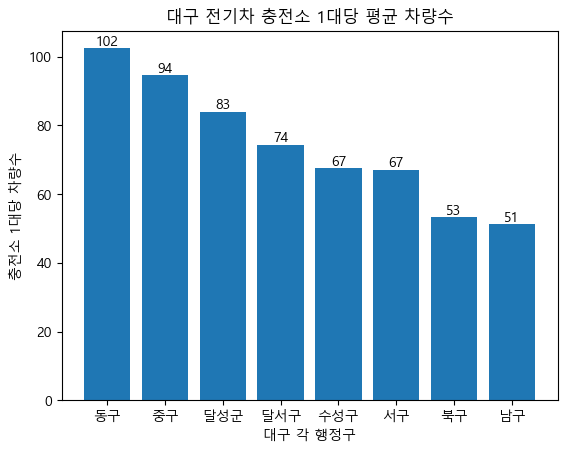

In [176]:
ECarPerCharger = pd.DataFrame({'대구 각 행정구' : df1_grouped['대구 각 행정구'],
                               '충전소당 차량수' : df1_grouped['총합계'] / df2_grouped['행정구별 합계']})

print(ECarPerCharger)

ECarPerCharger = ECarPerCharger.sort_values('충전소당 차량수', ascending = False)
plt.bar(ECarPerCharger['대구 각 행정구'], ECarPerCharger['충전소당 차량수'])
plt.xlabel('대구 각 행정구')
plt.ylabel('충전소 1대당 차량수')
plt.title('대구 전기차 충전소 1대당 평균 차량수')

for i, v in enumerate(ECarPerCharger['충전소당 차량수']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.show()

  대구 각 행정구  충전횟수    충전량
0       남구   477  10669
1      달서구  2639  57896
2      달성군  1297  24895
3       동구  2453  51153
4       북구  2596  59473
5       서구   937  19575
6      수성구  2001  46938
7       중구   848  12711


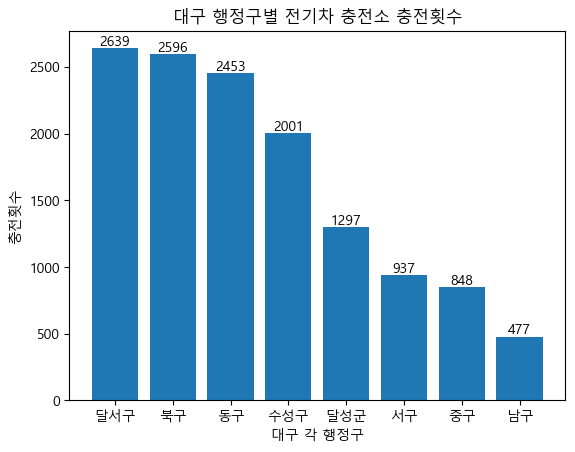

In [162]:
import pandas as pd

# Read the Excel file
df3 = pd.read_excel('ECarChargerUsing.xlsx', usecols=['충전소명', '주소', '충전횟수', '충전량(Kw)'])

df3['대구 각 행정구'] = df3['주소'].str.split(' ').str[1]
# 새로운 DataFrame 생성 (구 단위로 그룹화하여 전기차 등록 대수 합계 계산)
df3_grouped = df3.groupby('대구 각 행정구')['충전횟수'].sum().reset_index()
# Group by '대구 각 행정구' and calculate the sum of '충전량'
df3_grouped['충전량'] = df3.groupby('대구 각 행정구')['충전량(Kw)'].sum().values

# Display the updated dataframe
print(df3_grouped)

df3_grouped = df3_grouped.sort_values('충전횟수', ascending=False)
plt.bar(df3_grouped['대구 각 행정구'], df3_grouped['충전횟수'])
plt.xlabel('대구 각 행정구')
plt.ylabel('충전횟수')
plt.title('대구 행정구별 전기차 충전소 충전횟수')

for i, v in enumerate(df3_grouped['충전횟수']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

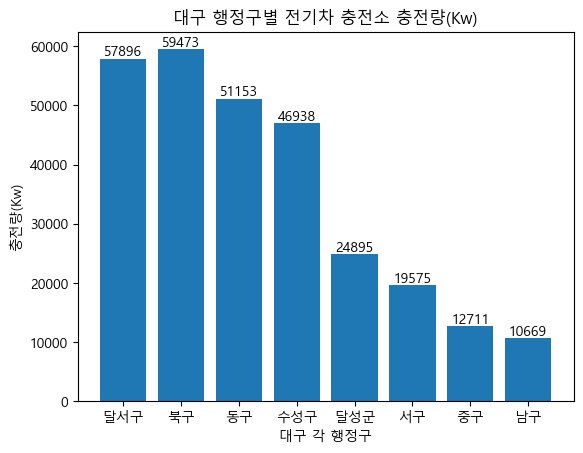

In [165]:
plt.bar(df3_grouped['대구 각 행정구'], df3_grouped['충전량'])
plt.xlabel('대구 각 행정구')
plt.ylabel('충전량(Kw)')
plt.title('대구 행정구별 전기차 충전소 충전량(Kw)')

for i, v in enumerate(df3_grouped['충전량']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

  대구 각 행정구  충전소 1대당 충전횟수
0       남구     36.692308
1      달서구     45.500000
2      달성군     41.838710
3       동구     62.897436
4       북구     45.543860
5       서구     52.055556
6      수성구     36.381818
7       중구     47.111111


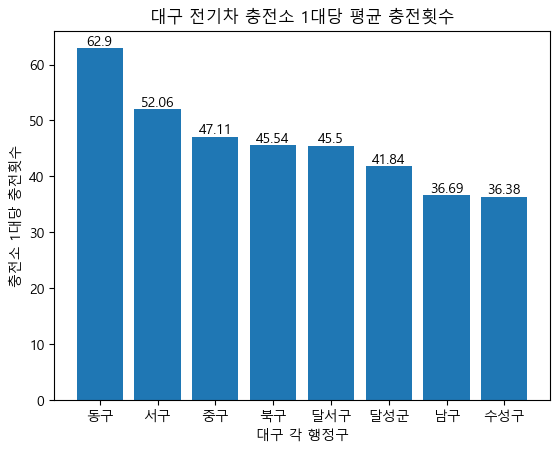

In [175]:
ChargingNumPerCharger = pd.DataFrame({'대구 각 행정구' : df3_grouped['대구 각 행정구'],
                               '충전소 1대당 충전횟수' : df3_grouped['충전횟수'] / df2_grouped['행정구별 합계']})

print(ChargingNumPerCharger)

ChargingNumPerCharger = ChargingNumPerCharger.sort_values('충전소 1대당 충전횟수', ascending = False)
plt.bar(ChargingNumPerCharger['대구 각 행정구'], ChargingNumPerCharger['충전소 1대당 충전횟수'])
plt.xlabel('대구 각 행정구')
plt.ylabel('충전소 1대당 충전횟수')
plt.title('대구 전기차 충전소 1대당 평균 충전횟수')

for i, v in enumerate(ChargingNumPerCharger['충전소 1대당 충전횟수']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

  대구 각 행정구  충전소 1대당 충전량
0       남구   820.692308
1      달서구   998.206897
2      달성군   803.064516
3       동구  1311.615385
4       북구  1043.385965
5       서구  1087.500000
6      수성구   853.418182
7       중구   706.166667


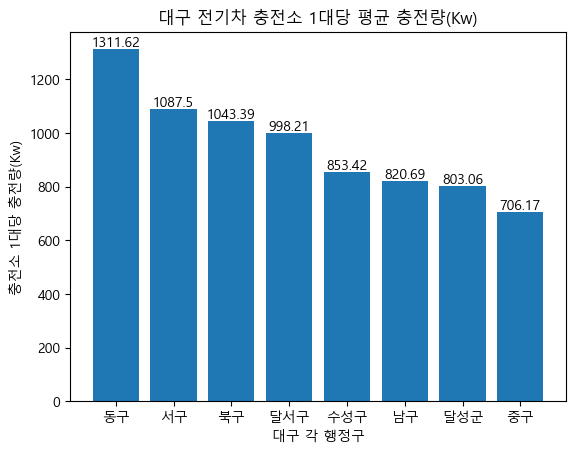

In [178]:
ChargingQuanPerCharger = pd.DataFrame({'대구 각 행정구' : df3_grouped['대구 각 행정구'],
                               '충전소 1대당 충전량' : df3_grouped['충전량'] / df2_grouped['행정구별 합계']})

print(ChargingQuanPerCharger)

ChargingQuanPerCharger = ChargingQuanPerCharger.sort_values('충전소 1대당 충전량', ascending = False)
plt.bar(ChargingQuanPerCharger['대구 각 행정구'], ChargingQuanPerCharger['충전소 1대당 충전량'])
plt.xlabel('대구 각 행정구')
plt.ylabel('충전소 1대당 충전량(Kw)')
plt.title('대구 전기차 충전소 1대당 평균 충전량(Kw)')

for i, v in enumerate(ChargingQuanPerCharger['충전소 1대당 충전량']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()